In [5]:
import matplotlib.pyplot as plt
import mpldatacursor
%matplotlib notebook 

<IPython.core.display.Javascript object>


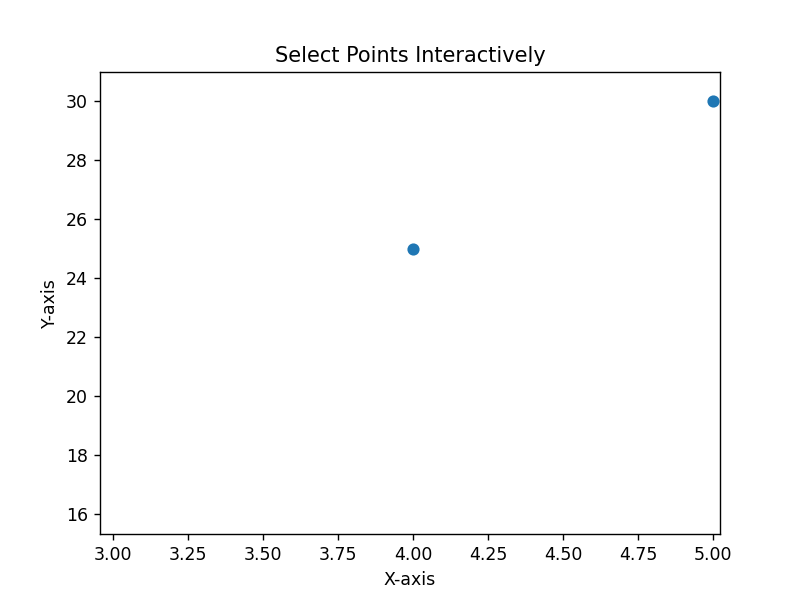

In [6]:

def on_pick(event):
    """Function to handle the pick event."""
    point = event.artist
    x, y = point.get_offsets()[event.ind[0]]
    print(f"Selected point: ({x}, {y})")

# Sample data for the scatter plot
x_data = [1, 2, 3, 4, 5]
y_data = [10, 20, 15, 25, 30]

fig, ax = plt.subplots()
scatter_plot = ax.scatter(x_data, y_data, picker=True)

# Connect the pick event to the handler function
fig.canvas.mpl_connect("pick_event", on_pick)

# Customize the plot appearance (optional)
ax.set_title("Select Points Interactively")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


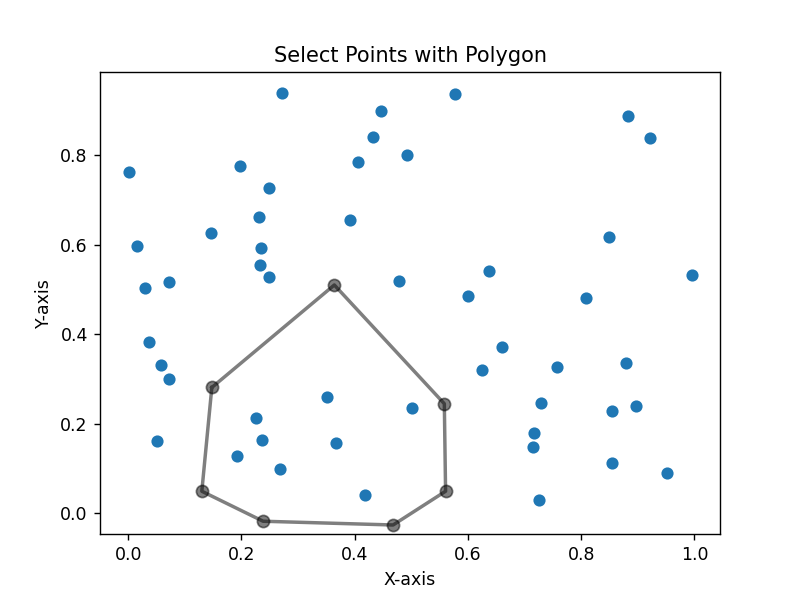

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import PolygonSelector

def onselect(verts):
    """Function to handle the selected polygon."""
    global selected_points
    selected_points = []
    for point in points:
        if point_in_polygon(point, verts):
            selected_points.append(point)
    print("Selected points:", selected_points)

def point_in_polygon(point, verts):
    """Check if a point is inside a polygon."""
    path = plt.mpl.path.Path(verts)
    return path.contains_point(point)

# Sample data for the scatter plot
x_data = np.random.rand(50)
y_data = np.random.rand(50)

points = np.column_stack((x_data, y_data))
selected_points = []

fig, ax = plt.subplots()
ax.scatter(x_data, y_data)

# Customize the plot appearance (optional)
ax.set_title("Select Points with Polygon")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# Create the polygon selector
polygon_selector = PolygonSelector(ax, onselect)

# Show the plot
plt.show()

# After you have finished selecting points with the polygon,
# you can save the selected points to a file or use them as needed.
# For example, you can save them to a CSV file:
np.savetxt("selected_points.csv", selected_points, delimiter=",")

In [8]:
selected_points

[]

In [9]:
polygon_selector

<IPython.core.display.Javascript object>


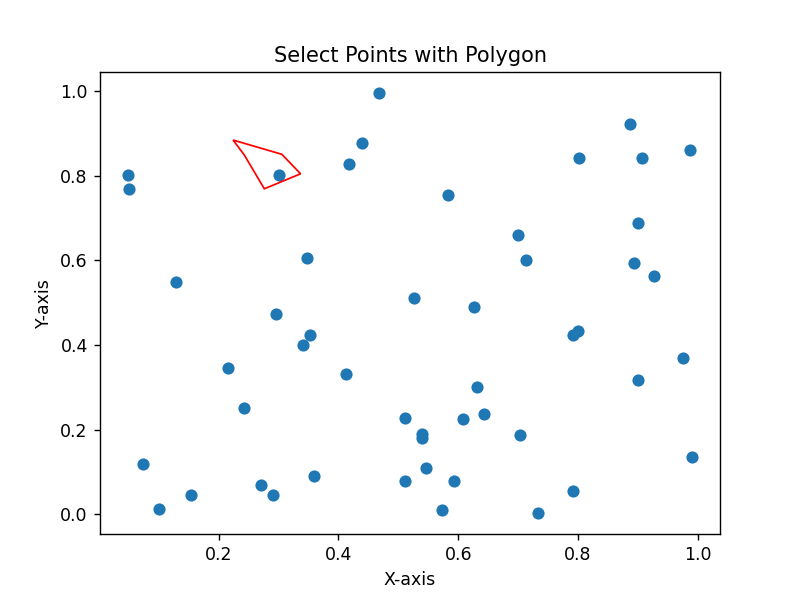

In [26]:
import numpy as np
import matplotlib.pyplot as plt

class PointSelector:
    def __init__(self, ax, x_data, y_data):
        self.ax = ax
        self.points = np.column_stack((x_data, y_data))
        self.selected_points = []
        self.poly = None
        self.cid = None
        self.connect_event()

    def connect_event(self):
        self.cid = self.ax.figure.canvas.mpl_connect("button_press_event", self.on_press)

    def on_press(self, event):
        if event.inaxes != self.ax:
            return
        if event.dblclick:
            self.save_points()
        else:
            self.selected_points.append((event.xdata, event.ydata))
            if self.poly is not None:
                self.poly.remove()
            self.poly = plt.Polygon(self.selected_points, edgecolor='r', fill=False)
            self.ax.add_patch(self.poly)
            self.ax.figure.canvas.draw()

    def save_points(self):
        print("Selected points:", self.selected_points)
        self.ax.figure.canvas.mpl_disconnect(self.cid)

# Sample data for the scatter plot
x_data = np.random.rand(50)
y_data = np.random.rand(50)

fig, ax = plt.subplots()
ax.scatter(x_data, y_data)

# Customize the plot appearance (optional)
ax.set_title("Select Points with Polygon")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

point_selector = PointSelector(ax, x_data, y_data)

# Show the plot
plt.show()

# Access the selected points from the point_selector object
selected_points = point_selector.selected_points

# After you have finished selecting points with the polygon,
# you can save the selected points to a file or use them as needed.
# For example, you can save them to a CSV file:
#np.savetxt("selected_points.csv", selected_points, delimiter=",")

In [27]:
selected_points

[(0.22394002029354876, 0.8837577422676578),
 (0.24272977208900004, 0.8483381538036633),
 (0.2761337752809134, 0.7686440797596759),
 (0.33667853106625634, 0.8040636682236703),
 (0.3053622780738376, 0.8501091062038616)]

In [29]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
print(polygon.contains(point))

True


In [33]:
import pandas as pd
import numpy as np
from shapely.geometry import Polygon, Point

# Sample data for the polygon coordinates (replace with your actual polygon data)
polygon_coordinates = np.array([
    [0.5, 0.5],
    [0.7, 0.8],
    [0.6, 0.9],
    [0.4, 0.7]
])

# Sample data for the DataFrame (replace with your actual DataFrame)
data = {
    'X': np.random.rand(100),
    'Y': np.random.rand(100),
    'Other_Info': np.random.randint(1, 100, 100)
}
df = pd.DataFrame(data)

# Create a Polygon object from the polygon coordinates
polygon = Polygon(polygon_coordinates)

# Function to check if a point (x, y) is within the polygon
def is_point_within_polygon(x, y):
    point = Point(x, y)
    return polygon.contains(point)

# Use the function to create a mask for selecting rows in the DataFrame
mask = df.apply(lambda row: is_point_within_polygon(row['X'], row['Y']), axis=1)

# Select the rows that are within the polygon
selected_rows = df[mask]

# Print the selected rows
print(selected_rows)

           X         Y  Other_Info
34  0.519595  0.755985          75
60  0.488540  0.667568          42
